# Desafio 1
## Reconhecimento de faces

Utilize o dataset 101 de faces da [Caltech](http://www.vision.caltech.edu/html-files/archive.html). Nela existem 20 sujeitos com 20 imagens cada uma.

Analise as imagens, extraia o rosto de cada sujeito e avalie alinhar a região de interesse delas.

Separe as imagens para conter um grupo para treinamento (70%) e outro para testes de validação (30%)

![](imagens/caltech-101-faces.png)

## 1. Requerimentos

### 1.1 Bibliotecas

Todas as bibliotecas já estão instaladas no Google Colab.

* OpenCV >= 3.4.3
* Numpy >= 1.18.1
* Matplotlib > =3.1.3

### 1.2 Arquivos

Baixe o repositório do GitHub utilizando o comando abaixo. Em caso de atualização, utilize o comando para apagar o diretório antes.

In [14]:
!rm -rf dataset-caltech-101-faces/

In [15]:
!git clone https://github.com/michelpf/dataset-caltech-101-faces

Cloning into 'dataset-caltech-101-faces'...
remote: Enumerating objects: 451, done.
remote: Counting objects: 100% (451/451), done.
remote: Compressing objects: 100% (449/449), done.
remote: Total 451 (delta 0), reused 445 (delta 0), pack-reused 0
Receiving objects: 100% (451/451), 65.99 MiB | 34.44 MiB/s, done.


Vamos agora posicionar o diretório do repositório para a aula respectiva. Nesse caso envie o comando de mudança de diretório.

In [16]:
%cd dataset-caltech-101-faces

/content/dataset-caltech-101-faces


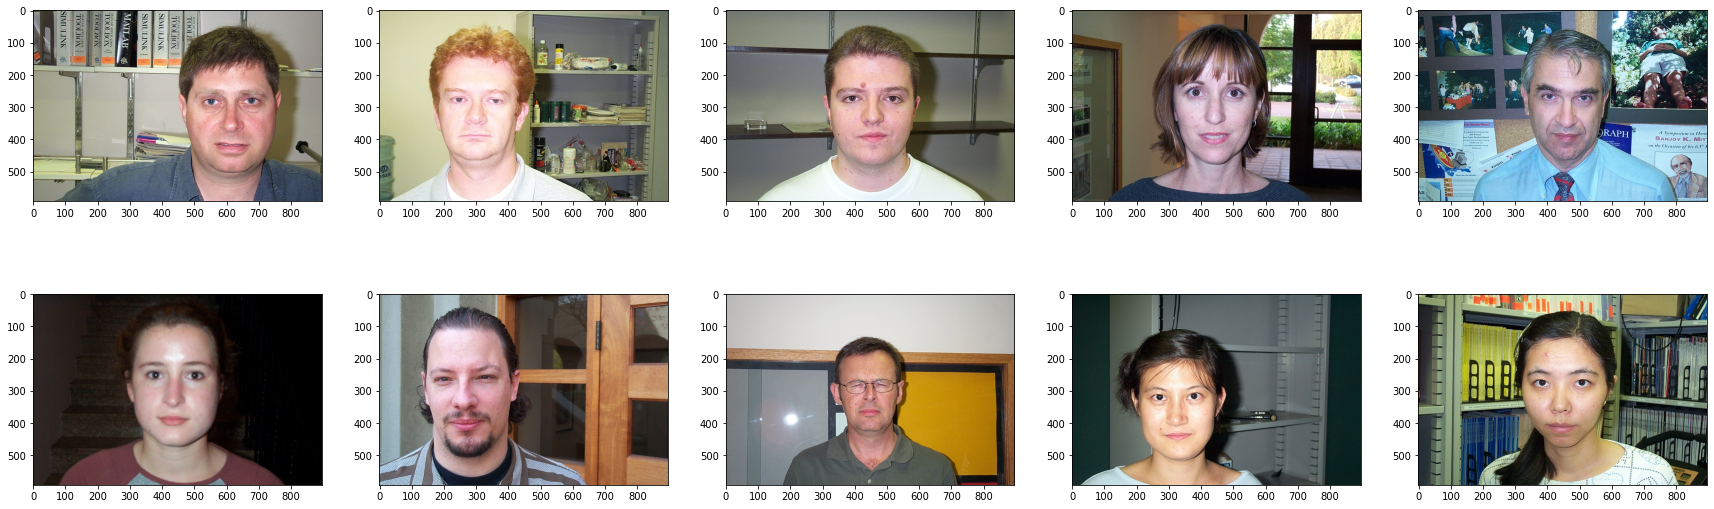

In [27]:
img1 = cv2.imread("dataset/1/image_0001.jpg")
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.imread("dataset/2/image_0022.jpg")
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
img3 = cv2.imread("dataset/3/image_0047.jpg")
img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)
img4 = cv2.imread("dataset/4/image_0069.jpg")
img4 = cv2.cvtColor(img4, cv2.COLOR_BGR2RGB)
img5 = cv2.imread("dataset/5/image_0090.jpg")
img5 = cv2.cvtColor(img5, cv2.COLOR_BGR2RGB)
img6 = cv2.imread("dataset/6/image_0113.jpg")
img6 = cv2.cvtColor(img6, cv2.COLOR_BGR2RGB)
img7 = cv2.imread("dataset/7/image_0133.jpg")
img7 = cv2.cvtColor(img7, cv2.COLOR_BGR2RGB)
img8 = cv2.imread("dataset/8/image_0159.jpg")
img8 = cv2.cvtColor(img8, cv2.COLOR_BGR2RGB)
img9 = cv2.imread("dataset/9/image_0429.jpg")
img9 = cv2.cvtColor(img9, cv2.COLOR_BGR2RGB)
img10 = cv2.imread("dataset/10/image_0409.jpg")
img10 = cv2.cvtColor(img10, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(30,20))

plt.subplot(4,5,1)
plt.imshow(img1)
plt.subplot(4,5,2)
plt.imshow(img2)
plt.subplot(4,5,3)
plt.imshow(img3)
plt.subplot(4,5,4)
plt.imshow(img4)
plt.subplot(4,5,5)
plt.imshow(img5)
plt.subplot(4,5,6)
plt.imshow(img6)
plt.subplot(4,5,7)
plt.imshow(img7)
plt.subplot(4,5,8)
plt.imshow(img8)
plt.subplot(4,5,9)
plt.imshow(img9)
plt.subplot(4,5,10)
plt.imshow(img10)

plt.show()

Para o alinhamento e extração das faces vamos utilizar o Deepface.

In [4]:
!pip install deepface==0.0.74

     |████████████████████████████████| 63 kB 1.4 MB/s 
     |████████████████████████████████| 2.3 MB 10.8 MB/s 
     |████████████████████████████████| 462 kB 43.8 MB/s 


In [18]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import glob

from tqdm import tqdm

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

## 2. Solução

### 2.1 Extração de região de interesse

Implementar extrator de face.

In [7]:
from deepface import DeepFace

backends = ['opencv', 'ssd', 'dlib', 'mtcnn', 'retinaface', 'mediapipe']

def extrator_face_bgr_alinhado(path):
  try:
    face = DeepFace.detectFace(img_path = path, target_size = (200, 200), detector_backend = backends[4])
  except:
    face = None

  return face

### 2.2 Normalização

Normalizar o tamanho das imagens em 200 x 200.

In [19]:
for f in tqdm(glob.glob('dataset/**/*.jpg', recursive=True)):
  face = extrator_face_bgr_alinhado(f)
  if face is not None:
    face = cv2.cvtColor(face, cv2.COLOR_RGB2BGR)
    cv2.imwrite(f.split("/")[0] + "/" + f.split("/")[1] + "/"+ "proc_" + f.split("/")[2] , 255*face)

100%|██████████| 420/420 [02:52<00:00,  2.44it/s]


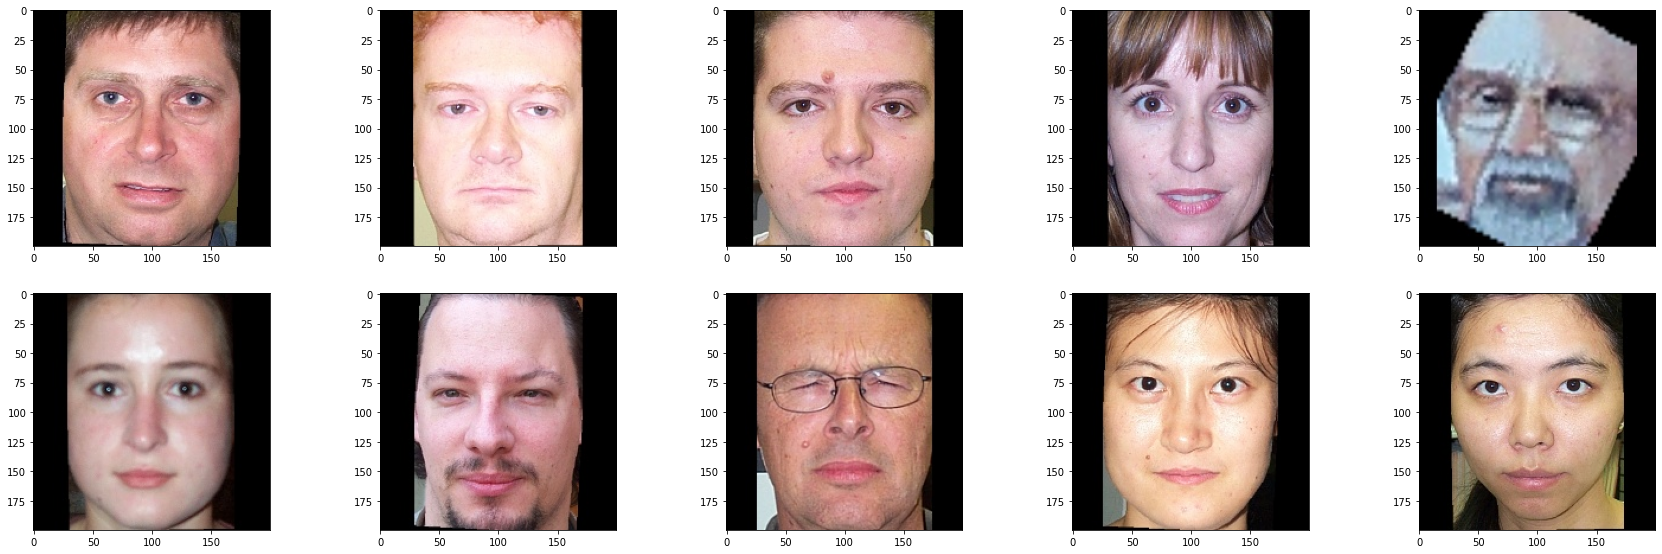

In [28]:
img1 = cv2.imread("dataset/1/proc_image_0001.jpg")
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.imread("dataset/2/proc_image_0022.jpg")
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
img3 = cv2.imread("dataset/3/proc_image_0047.jpg")
img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)
img4 = cv2.imread("dataset/4/proc_image_0069.jpg")
img4 = cv2.cvtColor(img4, cv2.COLOR_BGR2RGB)
img5 = cv2.imread("dataset/5/proc_image_0090.jpg")
img5 = cv2.cvtColor(img5, cv2.COLOR_BGR2RGB)
img6 = cv2.imread("dataset/6/proc_image_0113.jpg")
img6 = cv2.cvtColor(img6, cv2.COLOR_BGR2RGB)
img7 = cv2.imread("dataset/7/proc_image_0133.jpg")
img7 = cv2.cvtColor(img7, cv2.COLOR_BGR2RGB)
img8 = cv2.imread("dataset/8/proc_image_0159.jpg")
img8 = cv2.cvtColor(img8, cv2.COLOR_BGR2RGB)
img9 = cv2.imread("dataset/9/proc_image_0429.jpg")
img9 = cv2.cvtColor(img9, cv2.COLOR_BGR2RGB)
img10 = cv2.imread("dataset/10/proc_image_0409.jpg")
img10 = cv2.cvtColor(img10, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(30,20))

plt.subplot(4,5,1)
plt.imshow(img1)
plt.subplot(4,5,2)
plt.imshow(img2)
plt.subplot(4,5,3)
plt.imshow(img3)
plt.subplot(4,5,4)
plt.imshow(img4)
plt.subplot(4,5,5)
plt.imshow(img5)
plt.subplot(4,5,6)
plt.imshow(img6)
plt.subplot(4,5,7)
plt.imshow(img7)
plt.subplot(4,5,8)
plt.imshow(img8)
plt.subplot(4,5,9)
plt.imshow(img9)
plt.subplot(4,5,10)
plt.imshow(img10)

plt.show()

### 2.3 Treinamento

Carregando base de treinamento.

In [21]:
lista_sujeitos = []
lista_imagens = []

for f in tqdm(glob.glob("dataset/**/proc_*.jpg", recursive=True)):
  lista_sujeitos.append(f.split("/")[1])
  imagem = cv2.imread(f)
  imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)
  lista_imagens.append(imagem)

100%|██████████| 420/420 [00:00<00:00, 671.52it/s]


In [22]:
X_train, X_test, y_train, y_test = train_test_split(lista_imagens, lista_sujeitos, test_size=0.33, random_state=42)

In [23]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(lista_sujeitos)
y_train = le.transform(y_train)
y_test = le.transform(y_test)

In [24]:
X_train = np.asarray(X_train, dtype=np.int32)
X_test = np.asarray(X_test, dtype=np.int32)

Treinamento do modelo

In [25]:
# Treinamento do modelo
model = cv2.face.LBPHFaceRecognizer_create()
model.train(X_train, y_train)

### 2.4 Validação dos resultados

Validar performance do modelo

In [26]:
y_pred = []

for item in X_test:
    y_pred.append(model.predict(item)[0])
    
acuracia = accuracy_score(y_test, y_pred)
acuracia

0.9424460431654677